## Boston Hosuing Price (Regression)

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

### 보스턴 주택 가격 데이터셋

In [2]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

### Standard scale

In [5]:
mean = train_data.mean(axis = 0)
train_data -= mean

# 표준편차를 구한다.
std = train_data.std(axis = 0)
train_data /= std

In [6]:
mean = test_data.mean(axis = 0)
test_data -= mean

# 표준편차를 구한다.
std = test_data.std(axis = 0)
test_data /= std

### 신경망 생성

In [7]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop', 
                loss='mse',
                metrics=['mae'])
  return model

### K-folder 검증

In [15]:
k = 4
NUM_EPOCHS = 500

num_val_samples = len(train_data) // k # 폴더의 사이즈
all_scores = []

for i in range(k):
    print('\n처리중인 폴드 #', i)
    
    # 검증 데이터를 준비: k번째 분할
    val_data   = train_data  [ i*num_val_samples : (i+1) * num_val_samples ]
    val_labels = train_labels[ i*num_val_samples : (i+1) * num_val_samples ]
    
    # 훈련 데이터의 준비:
    partial_train_data = np.concatenate(
        [
            train_data[ : i*num_val_samples], 
            train_data[(i+1)*num_val_samples : ]
        ], axis=0 )
    
    # 라벨 데이터의 준비:
    partial_train_labels = np.concatenate(
        [
            train_labels[ : i*num_val_samples], 
            train_labels[(i+1)*num_val_samples : ]
        ], axis=0 )
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels,
                        epochs= NUM_EPOCHS, 
                        batch_size = 1,
                        validation_data= (val_data, val_labels),
                        verbose = 0)
    
    mae_history = history.history['mae']
    all_scores.append(mae_history)


처리중인 폴드 # 0

처리중인 폴드 # 1

처리중인 폴드 # 2

처리중인 폴드 # 3


In [24]:
average_mae_history = [np.mean( [x[i] for x in all_scores]) for i in range(NUM_EPOCHS)]

Text(0, 0.5, 'Validation MAE')

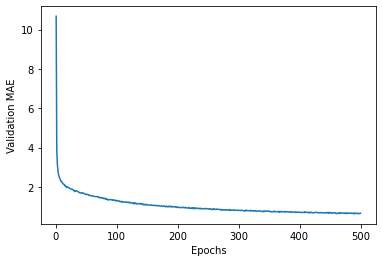

In [25]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history )
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')